In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### Removing the outliers of age column

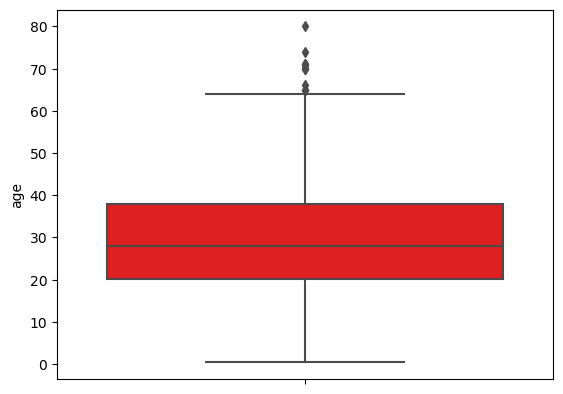

In [7]:
sns.boxplot(data=df,y='age',color='r');
plt.show()

### setting outlier limits

In [8]:
def outlier_limit(col):
    Q3,Q1=np.percentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1+1.5*IQR
    return UL,LL

In [9]:
UL,LL=outlier_limit(df['age'])
df['age']=np.where((df['age']>UL)|(df['age']<LL),np.nan,df['age'])

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.dropna(inplace=True)

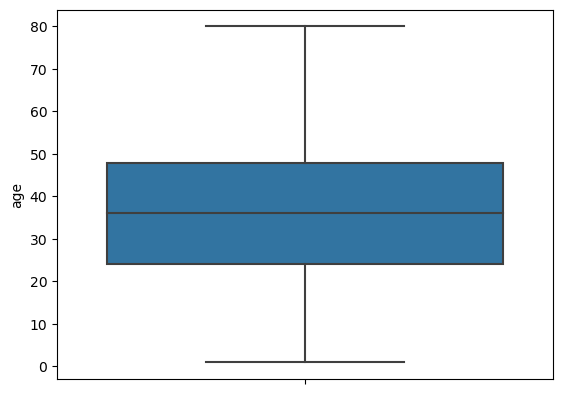

In [12]:
sns.boxplot(data=df,y='age');

###  Removing the outliers of 'fare' column

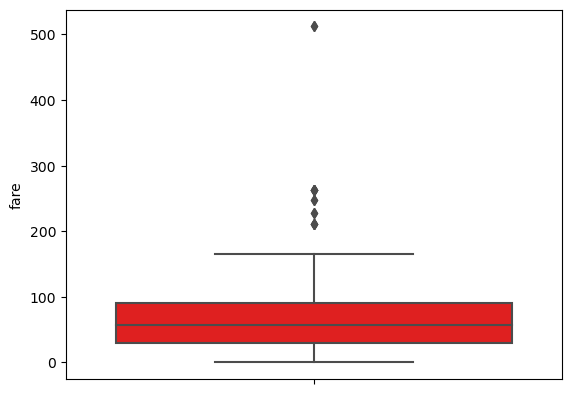

In [13]:
sns.boxplot(data=df,y='fare',color='r');
plt.show()

### setting outlier limits

In [14]:
def out_liers(col):
    Q3,Q1=np.percentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1+1.5*IQR
    return UL,LL

In [15]:
UL,LL=out_liers(df['fare'])
df['fare']=np.where((df['fare']>UL)|(df['fare']<LL),np.nan,df['fare'])

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare           170
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

In [17]:
df.dropna(inplace=True)

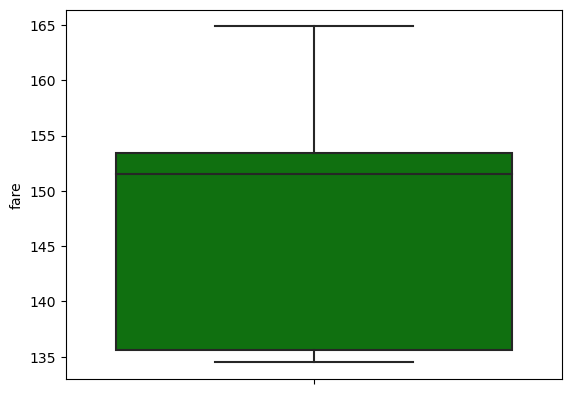

In [18]:
sns.boxplot(data=df,y='fare',color='g');
plt.show()

## dataset of healthexp

In [19]:
data=sns.load_dataset('healthexp')
data.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [21]:
data.shape

(274, 4)

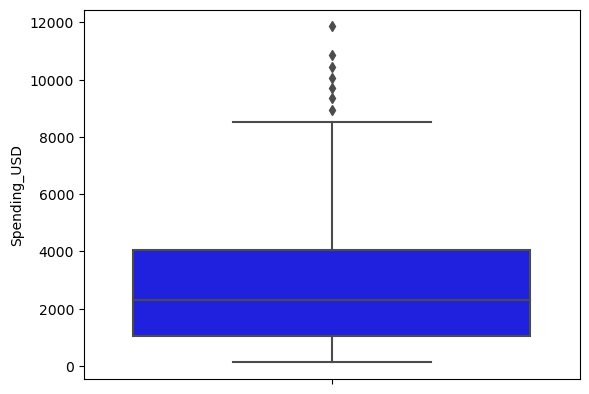

In [22]:
sns.boxplot(data=data,y='Spending_USD',color='b');
plt.show()

In [23]:
def outliers(col):
    Q3,Q1=np.percentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1+1.5*IQR
    return UL,LL

In [24]:
UL,LL=outliers(data['Spending_USD'])
data['Spending_USD']=np.where((data['Spending_USD']>UL)|(data['Spending_USD']<LL),np.nan,data['Spending_USD'])

In [25]:
data.isnull().sum()

Year                 0
Country              0
Spending_USD       257
Life_Expectancy      0
dtype: int64

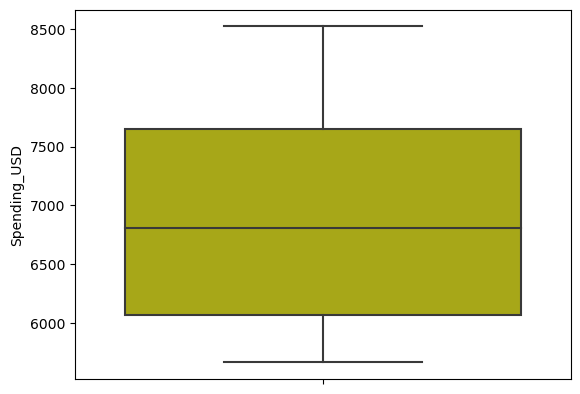

In [26]:
sns.boxplot(data=data,y='Spending_USD',color='y');
plt.show()